<a href="https://colab.research.google.com/github/kodindonesia/COLAB_Canvas-Video_Tutorials/blob/master/02_Manual_Style_Transfer_helper_kicolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# not necessary for Style Transfer: used only to create a video at the end of this notebook
# download Kodindonesia Colab helpers
!git clone https://github.com/kodindonesia/kicolab.git     &> /dev/null

In [ ]:
# not necessary for Style Transfer: used only to create a video at the end of this notebook
from kicolab.image_helper import Image_Super_Resolution, Image_Noise_Cancel, Cv_image          # import helpers in Python
from kicolab.cvhelper import Video_cv               # import helpers in Python
isr = Image_Super_Resolution()
inc = Image_Noise_Cancel()

from kicolab.style_transfer_helper import Style_transfer

In [ ]:
style_location = 'https://i.pinimg.com/originals/2d/e4/00/2de400f3b064b9aba83169f202e62d44.jpg' # starry night
#style_location = 'https://storage.googleapis.com/khanhlvg-public.appspot.com/arbitrary-style-transfer/style23.jpg' # abstract
#style_location = 'https://lifeskills.ge/wp-content/uploads/2019/06/DqIof7-onlpXioD-vItQxg_Leonardothumb800.jpg' # Leonardo da Vinci
#style_location = 'https://images.template.net/wp-content/uploads/2014/11/Pointillist-Wave-Beach-Scene.jpg' # Pointillist

st = Style_transfer(style_location, fastest=False) # , verbose=True    # verbose is used to get debug information

98304/96192 [==============================] - 0s 0us/step


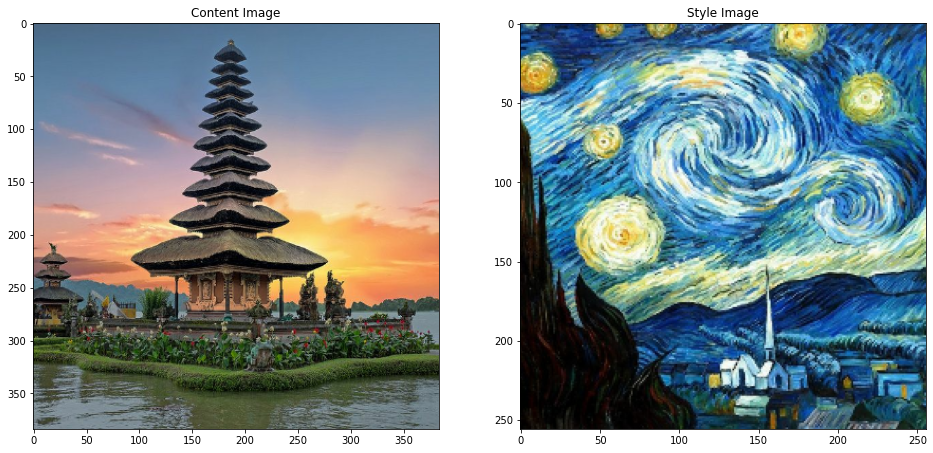

In [4]:
#content_location = 'https://storage.googleapis.com/khanhlvg-public.appspot.com/arbitrary-style-transfer/belfry-2611573_1280.jpg'
# content_location = 'https://www.history.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTU3ODc4NjAzNTM2MTQ4MTkx/hith-eiffel-tower-istock_000016468972large-2.jpg'
content_location = 'https://i.pinimg.com/originals/83/ec/e6/83ece611c1376d026a03d2749f51d15f.jpg' # Indonesia Ulan-Danu-Temple

st.set_content(content_location)
st.show_content_and_style()

In [5]:
st.create_stylized_image()
#Cv_image.show(st.get_opencv_stylized())

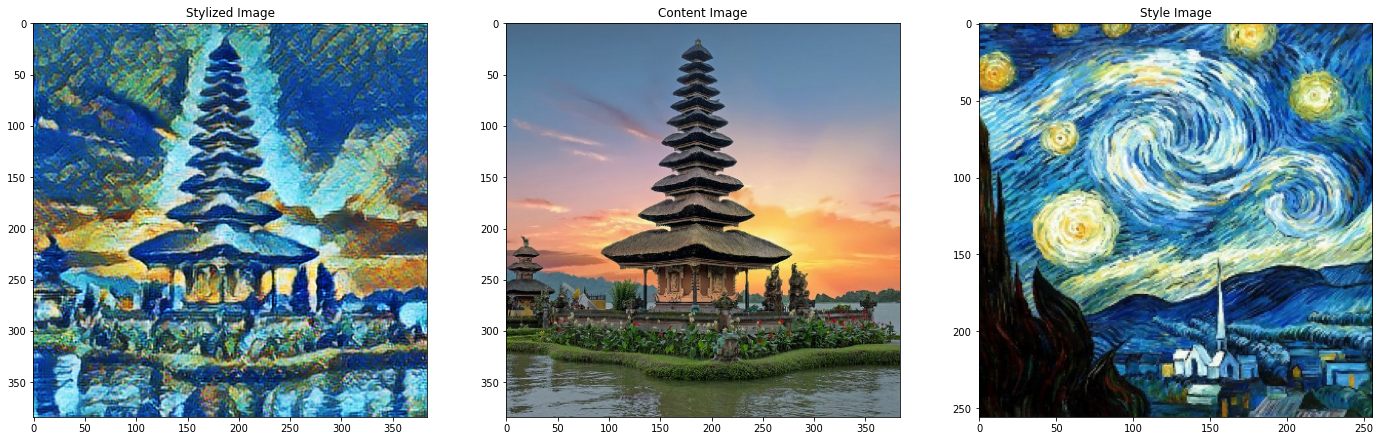

In [6]:
st.show_stylized_and_content_and_style()

In [7]:
st.create_stylized_and_content_image_blend(0.90) # 90% close to the original (meaning only 10% of the fulky stylesed above)
#Cv_image.show(st.get_opencv_stylized())

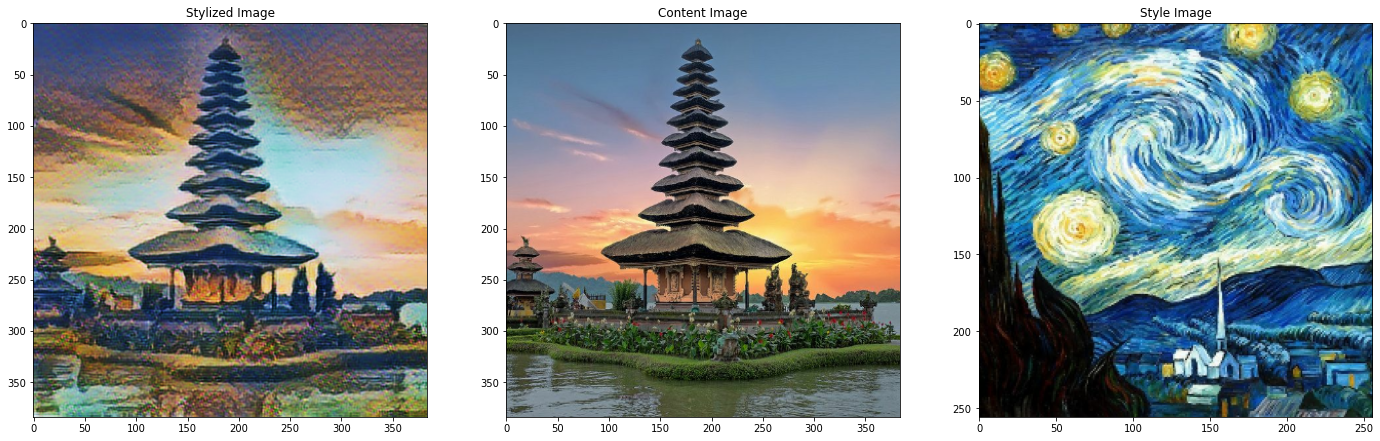

In [8]:
st.show_stylized_and_content_and_style()

# Combining other Kodindonesia helper tools

## Make videos

In [ ]:
# create video
import numpy as np

def content():  
  return st.get_opencv_content()

def stylized():  
  st.create_stylized_image()
  return st.get_opencv_stylized()

def stylized_blend(percentage):
  st.create_stylized_and_content_image_blend(percentage)
  return st.get_opencv_stylized()

def create_video(video_name='style-transfer', frames_num=10, fps=10, download=False):
  cvimg = content()
  vid = Video_cv(fps, video_name, frame=cvimg) # set video size
  vid.write_frame(cvimg) # write 1st frame as content
  for percentage in np.linspace(.05, .9999, frames_num):
    vid.write_frame( stylized_blend(1-percentage) ) # write intermediate frames
  vid.write_frame( stylized() ) # write last frame as fully stylized
  vid.end_video(download=download, show=False) 
  return vid


create_video('small', frames_num=24, fps=3).show()

## Increase image size (and clean image imperfections)

In [10]:
style_location = 'https://storage.googleapis.com/khanhlvg-public.appspot.com/arbitrary-style-transfer/style23.jpg' # abstract
st.set_style(style_location)
st.create_stylized_image()
st.show_stylized_and_content_and_style()

114688/108525 [===============================] - 0s 0us/step


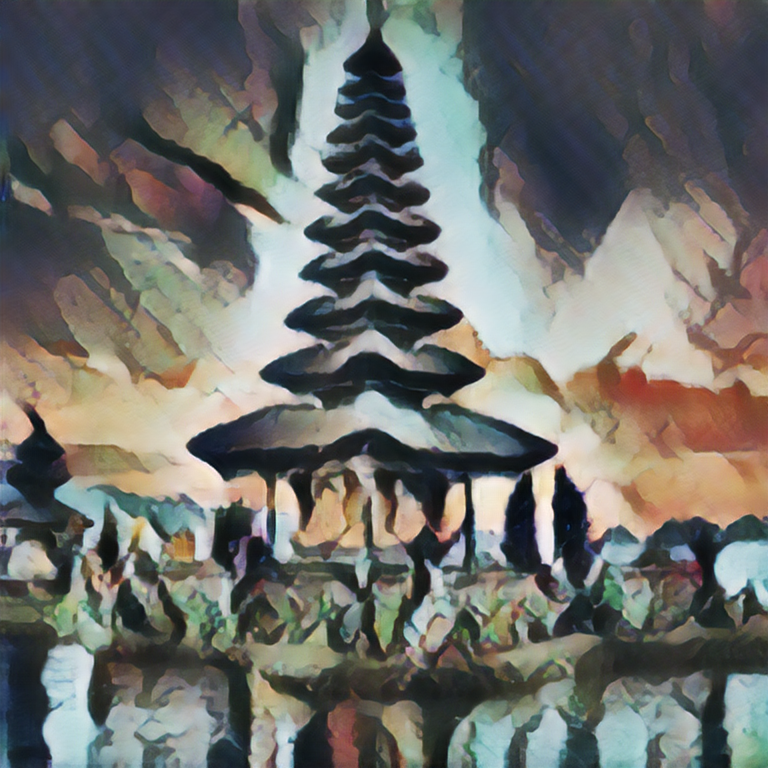

In [11]:
cvimg = inc.clean_cvimage_and_scale_by_2x( st.get_opencv_stylized() )
Cv_image.show(cvimg)

## Increase image size by 4x using Artificial Intelligence

98304/95965 [==============================] - 0s 0us/step


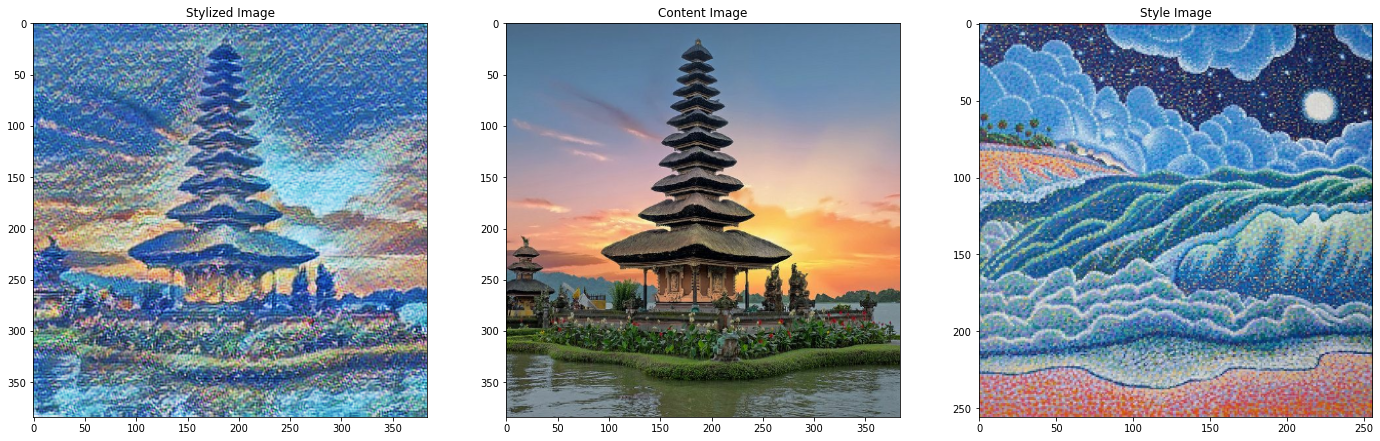

In [12]:
style_location = 'https://lifeskills.ge/wp-content/uploads/2019/06/DqIof7-onlpXioD-vItQxg_Leonardothumb800.jpg' # Leonardo da Vinci
style_location = 'https://images.template.net/wp-content/uploads/2014/11/Pointillist-Wave-Beach-Scene.jpg' # Pointillist
st.set_style(style_location)
st.create_stylized_image()
st.show_stylized_and_content_and_style()

In [ ]:
cvimg = isr.super_upscale_cvimage_by_4x( st.get_opencv_stylized() )
Cv_image.show(cvimg)